In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [132]:
df = pd.read_csv('Maternal Health Risk Data Set.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler


In [133]:
print(X)

[[ 25. 130.  80.  15.  98.  86.]
 [ 35. 140.  90.  13.  98.  70.]
 [ 29.  90.  70.   8. 100.  80.]
 ...
 [ 35.  85.  60.  19.  98.  86.]
 [ 43. 120.  90.  18.  98.  70.]
 [ 32. 120.  65.   6. 101.  76.]]


In [134]:
print(y)

['high risk' 'high risk' 'high risk' ... 'high risk' 'high risk'
 'mid risk']


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [137]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10, p=3)
knn.fit(X_train, y_train)
y_pred_test_knn = knn.predict(X_test)
print(f'Accuracy on test set: {knn.score(X_test, y_test)}')
print(f'Accuracy on train set: {knn.score(X_train, y_train)}')

Accuracy on test set: 0.6551724137931034
Accuracy on train set: 0.7398273736128237


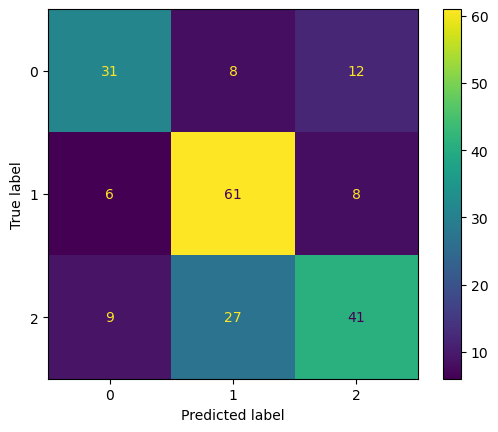

In [138]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_test_knn, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.gca().grid(False)

In [139]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_test_gnb = gnb.predict(X_test)
print(f'Accuracy on test set: {gnb.score(X_test, y_test)}')
print(f'Accuracy on train set: {gnb.score(X_train, y_train)}')

Accuracy on test set: 0.5566502463054187
Accuracy on train set: 0.6177558569667078


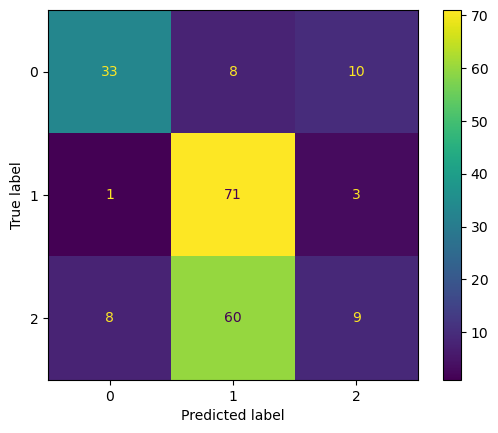

In [140]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_test_gnb, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.gca().grid(False)

In [141]:
#Cross entropy

In [142]:
from sklearn.metrics import log_loss

# Dự đoán xác suất thay vì nhãn
y_prob_test_gnb = gnb.predict_proba(X_test)
print(y_test)

# Tính cross-entropy (log loss) giữa nhãn thực tế và xác suất dự đoán
cross_entropy_loss = log_loss(y_test, y_prob_test_gnb)

print(f'Cross-entropy loss on test set: {cross_entropy_loss}')

[1 2 1 0 2 0 0 0 1 1 1 2 1 2 1 1 2 0 0 1 2 1 2 0 2 2 2 2 2 2 0 2 2 0 2 2 0
 2 0 0 1 1 1 2 2 1 0 1 1 1 2 1 0 0 2 2 0 0 1 0 1 0 0 1 0 2 1 2 0 1 2 0 2 1
 2 1 2 1 2 1 2 0 1 1 1 2 1 0 1 0 1 0 2 1 0 1 2 2 2 0 0 2 1 1 1 2 1 2 2 2 1
 0 2 1 2 0 1 0 2 0 2 2 2 2 1 1 2 1 1 1 1 2 2 1 1 2 2 2 1 1 1 1 2 0 2 1 2 2
 2 2 2 1 1 0 1 1 1 1 1 2 1 2 2 0 1 1 2 1 1 0 2 2 2 2 0 0 2 1 0 0 1 2 0 0 2
 0 1 0 0 2 2 0 1 2 0 0 2 1 1 2 1 1 0]
Cross-entropy loss on test set: 1.1095476760263188


In [143]:
from sklearn.metrics import log_loss

# Dự đoán xác suất thay vì nhãn
y_prob_test_knn = knn.predict_proba(X_test)

# Tính cross-entropy (log loss) giữa nhãn thực tế và xác suất dự đoán
cross_entropy_loss = log_loss(y_test, y_prob_test_knn)

print(f'Cross-entropy loss on test set (knn): {cross_entropy_loss}')

Cross-entropy loss on test set (knn): 1.53575086877104


In [144]:
from sklearn.metrics import f1_score
score = f1_score(y_test, y_pred_test_knn, average='macro')
print(f'F1 score (knn) on test set: {score}')

F1 score (knn) on test set: 0.6489428162267813


In [145]:
from sklearn.metrics import f1_score
score = f1_score(y_test, y_pred_test_gnb, average='macro')
print(f'F1 score (Naive Bayes) on test set: {score}')

F1 score (Naive Bayes) on test set: 0.5183490010140598


In [146]:
from sklearn.metrics import recall_score
score = recall_score(y_test, y_pred_test_knn, average='macro')
print(f'Recall score (knn) on test set: {score}')

Recall score (knn) on test set: 0.6512146676852559


In [147]:
from sklearn.metrics import recall_score
score = recall_score(y_test, y_pred_test_gnb, average='macro')
print(f'Recall score (gnb) on test set: {score}')

Recall score (gnb) on test set: 0.5702028690263984
